In [38]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import os
import tensorflow as tf

### Data Load and preprocess

In [55]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

img_rows, img_cols = 28, 28
batch_size = 128
num_classes = 10
epochs = 15

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('----------------------------------------------------------')
print(f'Sample Images datatype {type(x_train[0])}')
print(f'Sample Labels datatype {type(y_train[0])}')

print('----------------------------------------------------------')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('----------------------------------------------------------')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('--------------- Labels (Train| Test) ---------------------')
print(y_train[0])
print(y_test[0])
print('----------------------------------------------------------')


----------------------------------------------------------
Sample Images datatype <class 'numpy.ndarray'>
Sample Labels datatype <class 'numpy.uint8'>
----------------------------------------------------------
x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
60000 train samples
10000 test samples
----------------------------------------------------------
--------------- Labels (Train| Test) ---------------------
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
----------------------------------------------------------


## CNN - (Model)

In [56]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

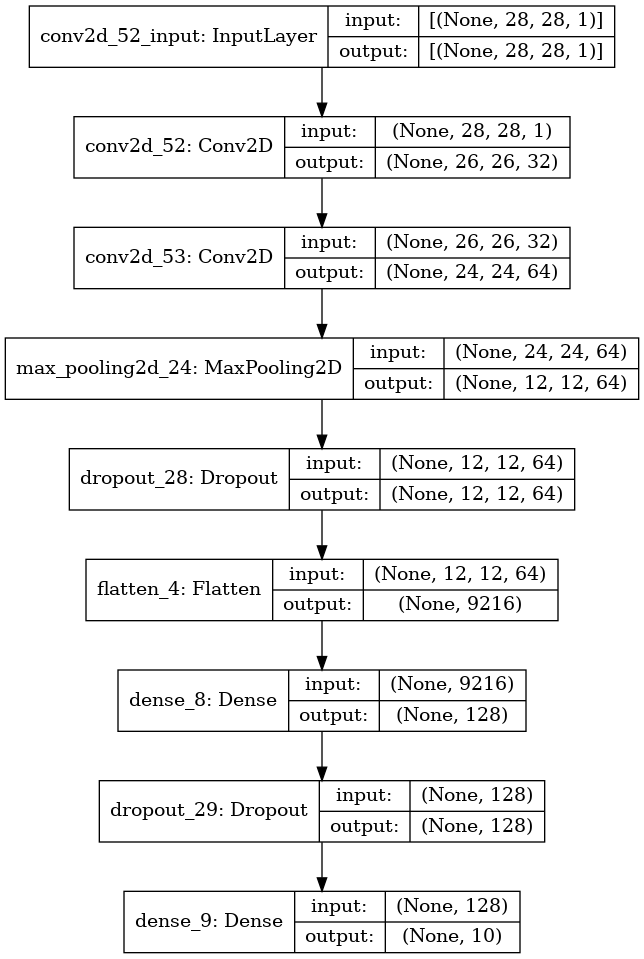

In [59]:
plot_model(model, to_file='model_mnist.png', show_shapes=True, show_layer_names=True)

In [61]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          verbose=0,
          validation_data=(x_test, y_test))

In [62]:
history.history['accuracy']

[0.6122999787330627,
 0.6386500000953674,
 0.6629499793052673,
 0.6838499903678894,
 0.6999666690826416]

### Model Accuracy | Loss

In [71]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy on test set: ",score[1])

Accuracy on test set:  0.8366000056266785


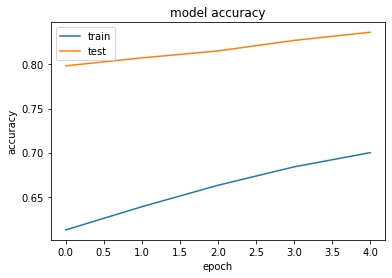

In [67]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

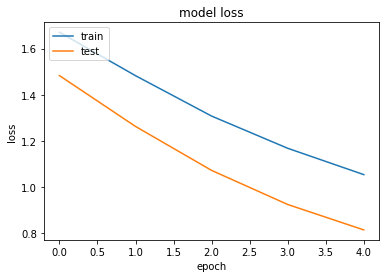

In [68]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

***